**cricket-football-baseball classification**

In [1]:
# unzipping the folder which contain train and test folder inside that images folder equal to no. of classes
! unzip "/content/drive/MyDrive/Colab Notebooks/Computer Vision/cricket-football-baseball.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Computer Vision/cricket-football-baseball.zip
   creating: cricket-football-baseball/test/
   creating: cricket-football-baseball/test/baseball/
  inflating: cricket-football-baseball/test/baseball/d11707df-88a0-4771-9998-03af5c945544.jpg  
  inflating: cricket-football-baseball/test/baseball/d8ab70fc-8319-4779-87bf-180f48a4414d.jpg  
  inflating: cricket-football-baseball/test/baseball/e5aa40d9-7f29-477f-94ed-2723e6382a8f.jpg  
  inflating: cricket-football-baseball/test/baseball/e5cd25b7-eaf6-4056-84dc-238bab74c29d.jpg  
  inflating: cricket-football-baseball/test/baseball/eb3baf60-1147-4ec4-81a3-92b5c9bf4367.jpg  
  inflating: cricket-football-baseball/test/baseball/ebc5aafe-72bf-4dca-9138-b9f1420bd113.jpg  
  inflating: cricket-football-baseball/test/baseball/ed923a13-db0d-4a65-936e-aaec9a93bec5.jpg  
  inflating: cricket-football-baseball/test/baseball/eef4978c-9f73-4f48-ade2-74a95a8f8abf.jpg  
  inflating: cricket-football-baseball

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
# importing os module to check no. of images present inside the folder
import os

train_baseball_dir = '/content/cricket-football-baseball/train/baseball'
train_cricket_dir = '/content/cricket-football-baseball/train/cricket'
train_football_dir = '/content/cricket-football-baseball/train/football'

test_baseball_dir = '/content/cricket-football-baseball/test/baseball'
test_cricket_dir = '/content/cricket-football-baseball/test/cricket'
test_football_dir = '/content/cricket-football-baseball/test/football'

In [3]:
print('total train baseball images:', len(os.listdir(train_baseball_dir)))
print('total train cricket images:', len(os.listdir(train_cricket_dir)))
print('total train football images:', len(os.listdir(train_football_dir)))

print('total test baseball images:', len(os.listdir(test_baseball_dir)))
print('total test cricket images:', len(os.listdir(test_cricket_dir)))
print('total test football images:', len(os.listdir(test_football_dir)))


total train baseball images: 64
total train cricket images: 80
total train football images: 62
total test baseball images: 15
total test cricket images: 15
total test football images: 15


Now our train and test image data is ready. So we will create image generator and then define the model.

In [4]:
# ImageDataGenerator is used for augmentation (scaling,rotate,flip,shift and so on) of all images inside a folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/cricket-football-baseball/train'
test_dir = '/content/cricket-football-baseball/test'

# using only scaing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=4,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=4,
                                                  class_mode='categorical')

Found 206 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [5]:
# Defining the CNN model1
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten()) # convert 3D layer to 1D layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2)) # Used dropuot layer (drop 20% neurons during training) to avoid overfitting (regularization)
model1.add(Dense(3, activation='softmax')) # output is of 3 class so used 3 dense layer and activation softmax for multiclass

In [6]:
# Compiling the model and fitting on the train data
import warnings
warnings.filterwarnings("ignore")

model1.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.fit_generator(train_generator,epochs=10)

Epoch 1/10
52/52 [==============================] - 4s 20ms/step - loss: 1.1564 - accuracy: 0.3252
Epoch 2/10
52/52 [==============================] - 1s 15ms/step - loss: 1.0999 - accuracy: 0.3689
Epoch 3/10
52/52 [==============================] - 1s 15ms/step - loss: 1.1004 - accuracy: 0.3495
Epoch 4/10
52/52 [==============================] - 1s 15ms/step - loss: 1.1062 - accuracy: 0.3932
Epoch 5/10
52/52 [==============================] - 1s 15ms/step - loss: 1.0933 - accuracy: 0.3932
Epoch 6/10
52/52 [==============================] - 1s 16ms/step - loss: 1.0969 - accuracy: 0.4223
Epoch 7/10
52/52 [==============================] - 1s 16ms/step - loss: 1.0879 - accuracy: 0.4223
Epoch 8/10
52/52 [==============================] - 1s 15ms/step - loss: 1.0871 - accuracy: 0.4175
Epoch 9/10
52/52 [==============================] - 1s 15ms/step - loss: 1.1004 - accuracy: 0.4660
Epoch 10/10
52/52 [==============================] - 1s 15ms/step - loss: 1.0475 - accuracy: 0.4272


In [7]:
# Checking Testing loss and Accuracy
test_loss, test_accuracy = model1.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

12/12 [==============================] - 0s 21ms/step - loss: 1.1595 - accuracy: 0.3778
1.1595325469970703
0.3777777850627899


As we can see, using model1 we got training accuracy as 42% and Testing accuracy as 37% which is very bad, so we will try some other models

In [8]:
# In model1 we use only scaling in generator now we will Use more augmentation
train_datagen_augment = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_augment = train_datagen_augment.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=4,
                                                                    class_mode='categorical')

Found 206 images belonging to 3 classes.


In [9]:
# Defining the CNN model2
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model2.add(Dense(3, activation='softmax'))

In [10]:
# Compiling the model and fitting on the train data
model2.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model2.fit_generator(train_generator_augment,epochs=10)

Epoch 1/10
52/52 [==============================] - 3s 55ms/step - loss: 1.1470 - accuracy: 0.3447
Epoch 2/10
52/52 [==============================] - 3s 58ms/step - loss: 1.1093 - accuracy: 0.3641
Epoch 3/10
52/52 [==============================] - 3s 60ms/step - loss: 1.0957 - accuracy: 0.3932
Epoch 4/10
52/52 [==============================] - 3s 53ms/step - loss: 1.0887 - accuracy: 0.4029
Epoch 5/10
52/52 [==============================] - 3s 55ms/step - loss: 1.1320 - accuracy: 0.4126
Epoch 6/10
52/52 [==============================] - 3s 54ms/step - loss: 1.0837 - accuracy: 0.4126
Epoch 7/10
52/52 [==============================] - 3s 54ms/step - loss: 1.0890 - accuracy: 0.3981
Epoch 8/10
52/52 [==============================] - 3s 55ms/step - loss: 1.0966 - accuracy: 0.4126
Epoch 9/10
52/52 [==============================] - 3s 54ms/step - loss: 1.0712 - accuracy: 0.4272
Epoch 10/10
52/52 [==============================] - 3s 54ms/step - loss: 1.0970 - accuracy: 0.4029


In [11]:
# Checking Testing loss and Accuracy
test_loss, test_accuracy = model2.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

12/12 [==============================] - 0s 13ms/step - loss: 1.1035 - accuracy: 0.3778
1.103461503982544
0.3777777850627899


As we can see, using model2 we got training accuracy as 40% and Testing accuracy as 37% which is bad, so we will try another models which are pre-defined like vgg16, inceptionv3

In [12]:
# importing VGG16 predefined model from keras.applications
from tensorflow.keras.applications import VGG16

In [13]:
# creating object of vgg16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# weights= imagenet means use all parameter used in imagenet competition
# include_top = false means drop dense layer use only convo base layer
# inpute shape is as per our requirement

In [14]:
# Define model with futher layers
model3 = Sequential()
model3.add(vgg16)
model3.add(Flatten())
# model3.add(Dense(256, activation="relu"))
# model3.add(Dropout(0.2))
model3.add(Dense(3, activation='softmax'))

vgg16.trainable = False
# dont train it because it already well trained

In [15]:
# Compiling the model and fitting on the train data
model3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model3.fit_generator(train_generator_augment,epochs=20)

Epoch 1/20
52/52 [==============================] - 5s 72ms/step - loss: 1.6894 - accuracy: 0.4369
Epoch 2/20
52/52 [==============================] - 3s 58ms/step - loss: 0.8587 - accuracy: 0.6311
Epoch 3/20
52/52 [==============================] - 3s 58ms/step - loss: 0.8807 - accuracy: 0.6602
Epoch 4/20
52/52 [==============================] - 3s 58ms/step - loss: 0.7824 - accuracy: 0.7330
Epoch 5/20
52/52 [==============================] - 3s 59ms/step - loss: 0.8680 - accuracy: 0.6602
Epoch 6/20
52/52 [==============================] - 3s 59ms/step - loss: 0.7966 - accuracy: 0.7379
Epoch 7/20
52/52 [==============================] - 3s 58ms/step - loss: 0.6581 - accuracy: 0.7670
Epoch 8/20
52/52 [==============================] - 3s 58ms/step - loss: 0.6528 - accuracy: 0.7864
Epoch 9/20
52/52 [==============================] - 3s 58ms/step - loss: 0.5250 - accuracy: 0.7767
Epoch 10/20
52/52 [==============================] - 3s 58ms/step - loss: 0.3811 - accuracy: 0.8786
Epoch 11/

In [16]:
# Checking Testing loss and Accuracy
test_loss, test_accuracy = model3.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

12/12 [==============================] - 1s 84ms/step - loss: 1.4328 - accuracy: 0.6667
1.4327833652496338
0.6666666865348816


As we can see, using model3 we got training accuracy as 87% and Testing accuracy as 66% which is quite good as comapare to model1 & model2.
Let's try inceptionv3 model.

In [17]:
# importing inception predefined model from keras.applications.inceptionv3
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [18]:
# creating pre-traind model object
inception = InceptionV3(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

In [19]:
# useful for getting number of output classes
from glob import glob
folders = glob('/content/cricket-football-baseball/train/*')
folders

['/content/cricket-football-baseball/train/football',
 '/content/cricket-football-baseball/train/cricket',
 '/content/cricket-football-baseball/train/baseball']

In [20]:
# Define model with futher layers
model4 = Sequential()
model4.add(inception)
model4.add(Flatten())
model4.add(Dense(len(folders),activation='softmax'))
inception.trainable = False

In [21]:
# view the structure of the model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 153603    
                                                                 
Total params: 21,956,387
Trainable params: 153,603
Non-trainable params: 21,802,784
_________________________________________________________________


In [22]:
# Compiling the model and fitting on the train data
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model4.fit_generator(train_generator_augment,epochs=20)

Epoch 1/20
52/52 [==============================] - 8s 73ms/step - loss: 4.9770 - accuracy: 0.5485
Epoch 2/20
52/52 [==============================] - 3s 59ms/step - loss: 3.7410 - accuracy: 0.6990
Epoch 3/20
52/52 [==============================] - 3s 62ms/step - loss: 3.3640 - accuracy: 0.7476
Epoch 4/20
52/52 [==============================] - 3s 62ms/step - loss: 2.9039 - accuracy: 0.8107
Epoch 5/20
52/52 [==============================] - 3s 62ms/step - loss: 4.6047 - accuracy: 0.6990
Epoch 6/20
52/52 [==============================] - 3s 62ms/step - loss: 4.3181 - accuracy: 0.7524
Epoch 7/20
52/52 [==============================] - 3s 62ms/step - loss: 4.7951 - accuracy: 0.7913
Epoch 8/20
52/52 [==============================] - 3s 61ms/step - loss: 3.7075 - accuracy: 0.7816
Epoch 9/20
52/52 [==============================] - 3s 61ms/step - loss: 3.3006 - accuracy: 0.8155
Epoch 10/20
52/52 [==============================] - 3s 61ms/step - loss: 3.3696 - accuracy: 0.8252
Epoch 11/

In [23]:
# Checking Testing loss and Accuracy
test_loss, test_accuracy = model4.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

12/12 [==============================] - 2s 88ms/step - loss: 4.7718 - accuracy: 0.8222
4.77180290222168
0.8222222328186035


As we can see, using model4 we got training accuracy as 84% and Testing accuracy as 82% which is quite good.Let's try inceptionv3 model for prediction

In [24]:
# save model as a h5 file
# model4.save('model_inception.h5')

In [25]:
# predinting the test data
y_pred = model4.predict(test_generator)

In [26]:
# Showing the probability of each class
y_pred

array([[1.11765193e-28, 1.00000000e+00, 3.28420671e-30],
       [0.00000000e+00, 1.61933116e-31, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.89811775e-34],
       [8.21083595e-05, 9.99917865e-01, 1.08416737e-30],
       [1.00000000e+00, 3.33696703e-16, 0.00000000e+00],
       [1.97042677e-34, 9.99999046e-01, 9.85844395e-07],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.29180660e-33, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.02383443e-08, 3.14074246e-29],
       [4.28754310e-10, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.35096112e-36, 2.64940411e-01, 7.35059559e-01],
       [1.21043465e-14, 1.00000000e+00, 0.00000000e+00],
       [1.01505465e-22, 1.00000

In [27]:
# getting maximun probability index
y_pred = np.argmax(y_pred, axis=1)

In [28]:
# showing the result of prediction class
y_pred

array([1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2,
       2])

Now let's try our model on a single image prediction

In [29]:
# importing libraries for image processing
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
# loading the image
img=image.load_img('/content/cricket-football-baseball/test/baseball/f2eeea85-9966-4f34-9769-7ef126490e3c.jpg',target_size=(224,224))

In [31]:
# converting image to array
x=image.img_to_array(img)
x

array([[[127., 114., 108.],
        [131., 118., 112.],
        [125., 112., 106.],
        ...,
        [167., 190., 208.],
        [160., 186., 203.],
        [153., 180., 197.]],

       [[118., 105.,  99.],
        [123., 110., 104.],
        [121., 108., 102.],
        ...,
        [162., 188., 205.],
        [156., 182., 199.],
        [149., 176., 195.]],

       [[119., 106., 100.],
        [123., 110., 104.],
        [122., 109., 103.],
        ...,
        [157., 183., 200.],
        [151., 178., 195.],
        [145., 172., 191.]],

       ...,

       [[ 92.,  65.,  44.],
        [ 95.,  67.,  46.],
        [ 96.,  66.,  42.],
        ...,
        [ 10.,  10.,  22.],
        [ 16.,  16.,  26.],
        [  7.,   7.,  15.]],

       [[ 91.,  64.,  43.],
        [ 93.,  65.,  43.],
        [ 96.,  66.,  42.],
        ...,
        [ 12.,  12.,  24.],
        [ 11.,  11.,  21.],
        [  1.,   1.,   9.]],

       [[ 88.,  61.,  40.],
        [ 89.,  61.,  39.],
        [ 94.,  

In [32]:
# shape of image array
x.shape

(224, 224, 3)

In [33]:
# some preprocessing on image data
from tensorflow.keras.applications.inception_v3 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
# predicting image
model4.predict(img_data)

array([[9.9947041e-01, 5.2957184e-04, 4.9868780e-19]], dtype=float32)

In [35]:
# getting index no. of max probability
a=np.argmax(model4.predict(img_data), axis=1)
a

array([0])

Prediction is : baseball


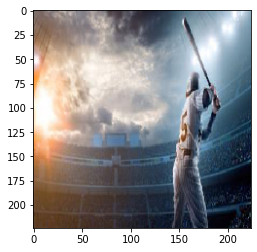

In [36]:
# showing the final result
classes = list(train_generator.class_indices.keys())
print(f"Prediction is : {classes[np.argmax(model4.predict(img_data))]}")
plt.imshow(img)
plt.show()

Here we can see the image is of baseball and inception model is predicting it as a baseball.

In [37]:
# let's define a function for prediction new image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# model=load_model("model_inception.h5")
def pred(img_path):
  img = image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  model4.predict(img_data)
  classes = list(train_generator.class_indices.keys())
  print(f"Prediction is : {classes[np.argmax(model4.predict(img_data))]}")
  plt.imshow(img)
  plt.show()


Prediction is : baseball


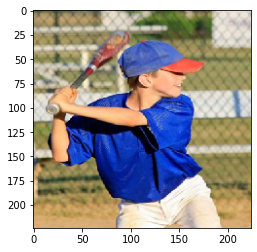

In [38]:
pred("/content/cricket-football-baseball/test/baseball/fa26a6a1-2f87-4528-b042-eef417384892.jpg")

Prediction is : cricket


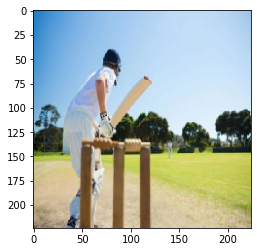

In [39]:
pred("/content/cricket-football-baseball/test/cricket/f15c1806-4283-4de3-a63e-d459fc4f7f0e.jpg")

Prediction is : football


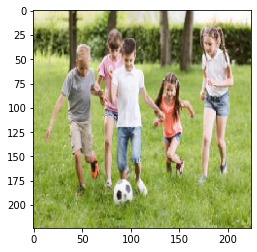

In [40]:
pred("/content/cricket-football-baseball/test/football/e5124aeb-1690-4427-84a9-d8c3995e0c0e.jpg")

Prediction is : cricket


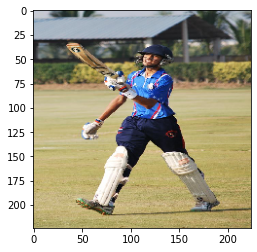

In [42]:
pred("/content/drive/MyDrive/Colab Notebooks/Computer Vision/cric_pred_img.jpg")

In [43]:
%cd "/content/drive/MyDrive/Colab Notebooks/Computer Vision"

#run these.

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf cricket-football-baseball-classification.ipynb

/content/drive/MyDrive/Colab Notebooks/Computer Vision
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-